# Real Estate Price Predictor


In [1]:
import numpy as np
import pandas as pd



In [2]:
housing=pd.read_csv("HousingData.csv")
housing.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
housing.shape

(506, 14)

In [4]:
# For information
# To check if it's contain any null or not

housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
# Another method-----# To check if it's contain any null or not

# If we want to describe our data
# Here 25% is 25 percentile like CF(cumulative frequency)
# Count---- no of values(NaN not include)
# Mean
# STD - How much values are far from mean


housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# To check values count

housing['CHAS'].value_counts()


0    471
1     35
Name: CHAS, dtype: int64

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

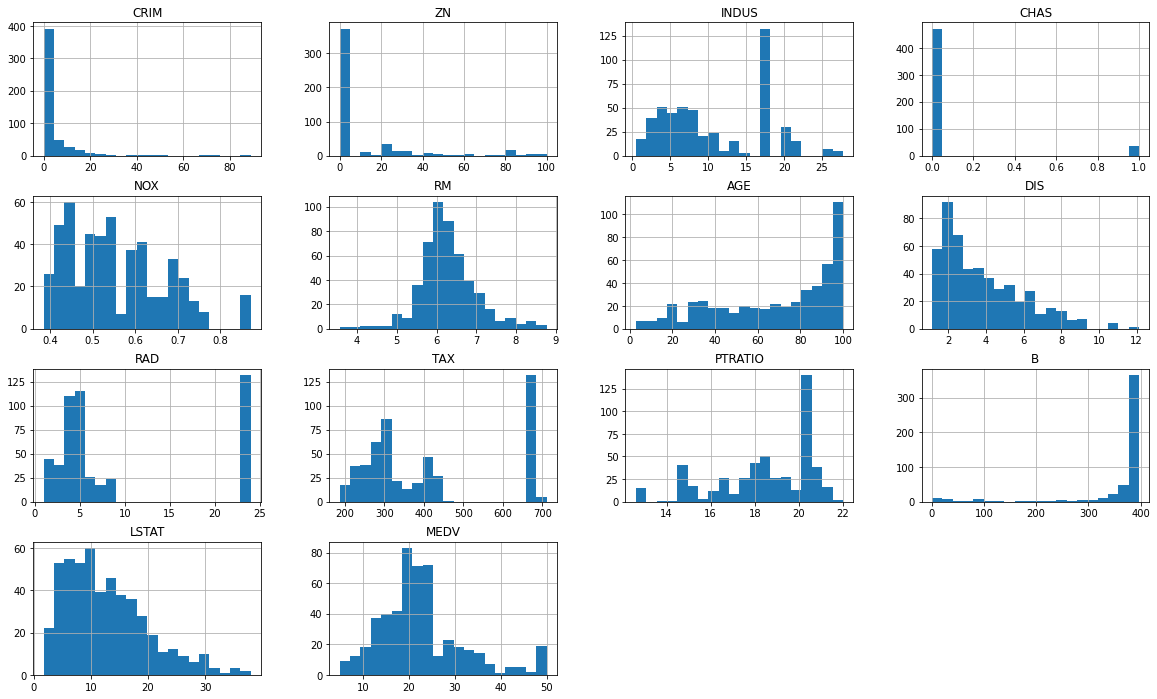

In [7]:
# Now creating a histogram for each column
# To check the nature of values for each feature

import matplotlib.pyplot as plt
%matplotlib inline

housing.hist(bins=20, figsize=(20,12))

# Looking for correlations

* How data is depend on each other(for now on MEDV)
* Like RM is .69 so it's strong positive correlation
* And LSTAT -.73 so it's strong negative correlation


In [8]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.696169
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>,
        <AxesSubplot:xlabel=

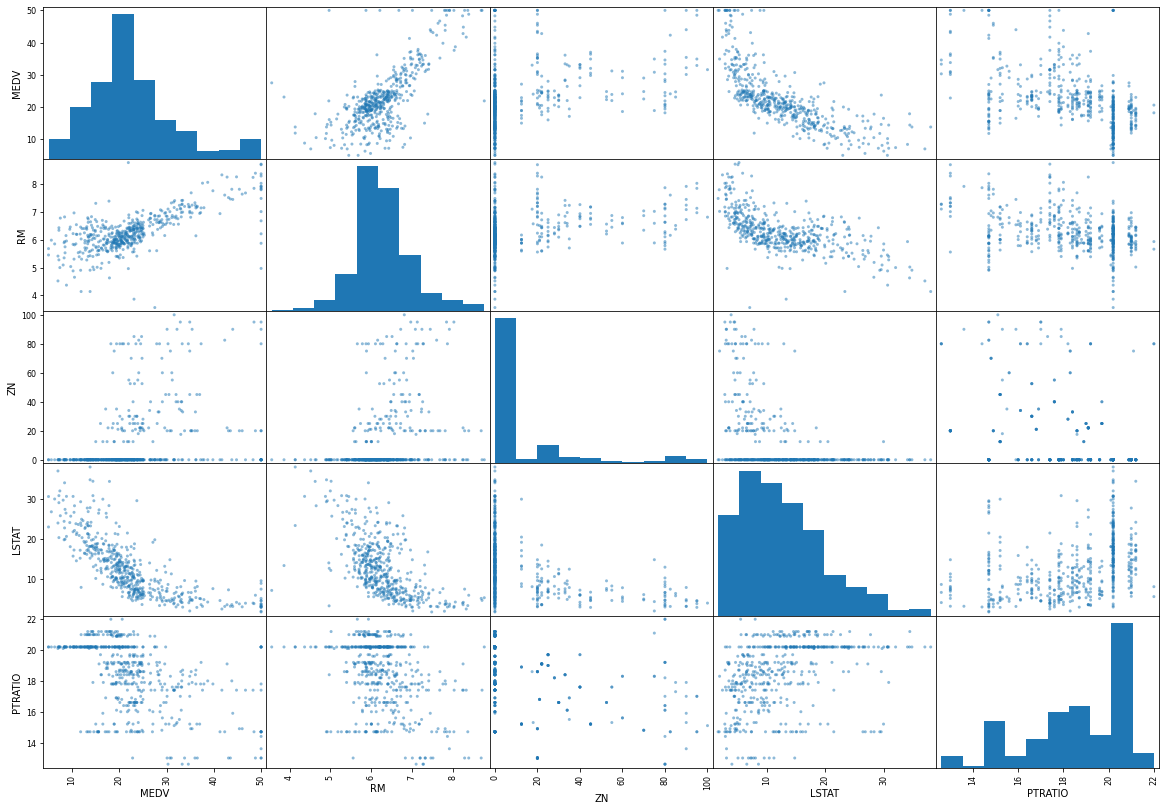

In [9]:
from pandas.plotting import scatter_matrix

attributes = ['MEDV', 'RM', 'ZN', 'LSTAT', 'PTRATIO']
scatter_matrix(housing[attributes], figsize=(20,14))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

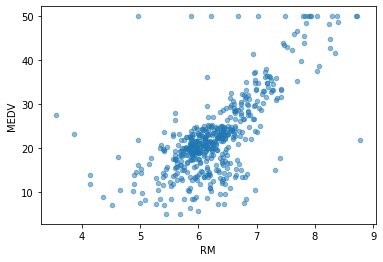

In [10]:
# To see differntly if you are intresting in any specific attribute
# Now we can remove these outliers

housing.plot(kind='scatter', x='RM', y='MEDV', alpha=0.5)


# Trying out Attribute Combinations

In [11]:
# It's mean we can creat other attribute in data as per our searching on the data
# like now we are creating a another attribute name with 'TaxPerRoom' as per below:


In [12]:
housing['TaxPerRoom']= housing['TAX']/housing['RM']
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TaxPerRoom
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984


In [13]:
housing.shape

(506, 15)

In [14]:
# Again fine the correlation matrix to see the correlation of new attribute

corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)


MEDV          1.000000
RM            0.696169
ZN            0.360445
B             0.333461
DIS           0.249929
CHAS          0.175260
AGE          -0.376955
RAD          -0.381626
CRIM         -0.388305
NOX          -0.427321
TAX          -0.468536
INDUS        -0.483725
PTRATIO      -0.507787
TaxPerRoom   -0.540380
LSTAT        -0.737663
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TaxPerRoom', ylabel='MEDV'>

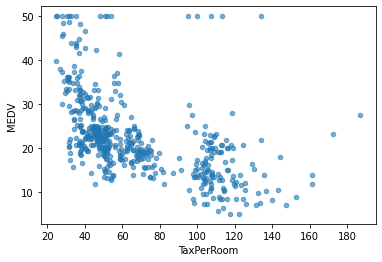

In [15]:
housing.plot(kind='scatter', x='TaxPerRoom', y='MEDV', alpha=0.6)


# Deal with Null Values

In [16]:
housing.info()
#RM is 501 here so it means there are some null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CRIM        506 non-null    float64
 1   ZN          506 non-null    float64
 2   INDUS       506 non-null    float64
 3   CHAS        506 non-null    int64  
 4   NOX         506 non-null    float64
 5   RM          501 non-null    float64
 6   AGE         506 non-null    float64
 7   DIS         506 non-null    float64
 8   RAD         506 non-null    int64  
 9   TAX         506 non-null    int64  
 10  PTRATIO     506 non-null    float64
 11  B           506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
 14  TaxPerRoom  501 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 59.4 KB


**To take care of missing attribute, you have 3 options:**

    1) Get rid of the missing datapoint
    2) Get rid of the whole attribute
    3) Set the value to 0 or mean or median
    
    
1) To remove those rows

2) If correlation is too low then we can remove

3) as attribute is important so we will set the value to some values(mean or median or zero)    

In [17]:
#Option 1: na row removed
# We are not changing our real data that's why we have store this in a variable
a=housing.dropna()
print(housing.shape,a.shape)

(506, 15) (501, 15)


In [18]:
# Option2 -- to delete the attribute

housing.drop('RM', axis=1).shape

# Not save bcoz it's only for runtime    

(506, 14)

In [19]:
# Option 3------ To set value : Now we are setting the median

#To compute Median

median= housing['RM'].median()
median


# To set median in nan

housing['RM'].fillna(median).shape

(506,)

# For missing in all columns we use Imputer Class

In [20]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [21]:
#All cols median

imputer.statistics_

array([2.56510000e-01, 0.00000000e+00, 9.69000000e+00, 0.00000000e+00,
       5.38000000e-01, 6.20800000e+00, 7.75000000e+01, 3.20745000e+00,
       5.00000000e+00, 3.30000000e+02, 1.90500000e+01, 3.91440000e+02,
       1.13600000e+01, 2.12000000e+01, 5.36078965e+01])

# Feature Scaling

ML algos will work better if numerical data with in same scale

like - RM hmara 8 tk jara h max but MEDV jara h 50 tk so our task is to scale these in a same format


**Primarily, two type of feature scaling method:**

1) Min-Max Scaling (Normalization)
(value-min)/(max-min)
for this sklearn provides MinMaxScaler class


2) Standardization:
(Value-mean)/sd
for this sklearn provide standard scaller for this


# Train _ Test Split By different methods

In [22]:
# First we done it manually

# For learning purpose
'''
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled= np.random.permutation(len(data))# Index shuffled 
    print(shuffled) #---- always give random value so we use random seed so that our model dont see test data
    test_set_size= int(len(data)*test_ratio)
    test_indicies= shuffled[:test_set_size]
    train_indicies= shuffled[test_set_size:]
    
    return data.iloc[train_indicies], data.iloc[test_indicies]

train_set, test_set= split_train_test(housing, .2)
print(f"Rows in train set {len(train_set)}\nRows in test_set {len(test_set)}")

'''    



'\ndef split_train_test(data, test_ratio):\n    np.random.seed(42)\n    shuffled= np.random.permutation(len(data))# Index shuffled \n    print(shuffled) #---- always give random value so we use random seed so that our model dont see test data\n    test_set_size= int(len(data)*test_ratio)\n    test_indicies= shuffled[:test_set_size]\n    train_indicies= shuffled[test_set_size:]\n    \n    return data.iloc[train_indicies], data.iloc[test_indicies]\n\ntrain_set, test_set= split_train_test(housing, .2)\nprint(f"Rows in train set {len(train_set)}\nRows in test_set {len(test_set)}")\n\n'

**Now we done it by sklit method**


In [23]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=.2, random_state=42)

print(f"Rows in train set {len(train_set)}\nRows in test_set {len(test_set)}")

Rows in train set 404
Rows in test_set 102


**Suppose you have one most important fetaure then you want to split that fetaure qually between train and test data**

 For Now we are considering CHSA is important for predicting the price
 For this we use Stratified splitting

'''
Exp : CHSA have 471 zeros and only 35 one so in case you divide all zeros in train and all 1 in test so 
in this model will ne confused

Then we divide the CHAS data equally
'''


In [24]:
from sklearn.model_selection import StratifiedShuffleSplit

split= StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=42)


In [25]:
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


In [26]:
#strat_train_set

strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [27]:
#strat_test_set

strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [28]:
strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TaxPerRoom
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.303353,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314,22.625490,63.818502
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.662996,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257,8.452344,30.909280
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,5.000000,28.994929
25%,0.057828,0.000000,4.950000,0.000000,0.448000,5.912750,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000,18.925000,40.393039
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.176000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000,21.500000,50.137268
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.539500,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500,25.000000,78.717047
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,160.947318


In [29]:
housing= strat_train_set.drop('MEDV',axis=1)
housing.shape

(404, 14)

In [30]:
housing_label= strat_train_set['MEDV']
housing_label.shape

(404,)

In [31]:
housing_test_feature= strat_test_set.drop('MEDV',axis=1)
housing_test_feature.shape

(102, 14)

In [32]:
housing_test_label = strat_test_set['MEDV']
housing_test_label.shape

(102,)

# Scikit-Learn Design

Premarily, three types of object:
    1) Estimators
    2) Transformers
    3) Predictors
    

1) **Estimators**:-  It estimate some parameter based on a Dataset (like - Imputer).
                 It has the fit method and transform method.
                 Fits method- Fits the data and calculate internal parameter
    
2) **Transformers**: Transformers method take inputs and return output based on the learning from fit().
                 Here we also have fit_transform() method it will be optimize rather than fit and transform

    
3) **Predictor** :-  Linear Regression 
                 Two common function ------ Fit() and predict()


# Pipeline 

Series of steps.
Code so that you can change your model in future easily


In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline= Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    
    #('std_scaler', StandardScaler())
    # And many more.................
])

In [34]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [35]:
#Now it becomes a numpy array for better speed and scaling

housing_num_tr


array([[4.81900000e-02, 8.00000000e+01, 3.64000000e+00, ...,
        3.92890000e+02, 6.57000000e+00, 5.15717092e+01],
       [1.50100000e-02, 8.00000000e+01, 2.01000000e+00, ...,
        3.90940000e+02, 5.99000000e+00, 4.22004521e+01],
       [4.87141000e+00, 0.00000000e+00, 1.81000000e+01, ...,
        3.96210000e+02, 1.86800000e+01, 1.02714374e+02],
       ...,
       [8.18700000e-02, 0.00000000e+00, 2.89000000e+00, ...,
        3.93530000e+02, 3.57000000e+00, 3.52941176e+01],
       [4.75237000e+00, 0.00000000e+00, 1.81000000e+01, ...,
        5.09200000e+01, 1.81300000e+01, 1.02068966e+02],
       [4.56000000e-02, 0.00000000e+00, 1.38900000e+01, ...,
        3.92800000e+02, 1.35100000e+01, 4.68750000e+01]])

In [36]:
housing_num_tr.shape

(404, 14)

# Select and train the Model for our company

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [38]:
#model=LinearRegression()

#model=DecisionTreeRegressor()

model=RandomForestRegressor()

model.fit(housing_num_tr, housing_label)

RandomForestRegressor()

In [39]:
some_data= housing_num_tr[:5]
some_label= housing_label[:5]

In [40]:
prepaerd_data= my_pipeline.transform(some_data)
model.predict(prepaerd_data)

array([22.233, 25.294, 16.428, 23.405, 23.485])

In [41]:
print(list(some_label))

[21.9, 24.5, 16.7, 23.1, 23.0]


# Evaluating the model

In [42]:
from sklearn.metrics import mean_squared_error

housing_predictions= model.predict(housing_num_tr)
mse = mean_squared_error(housing_label, housing_predictions)
rmse=np.sqrt(mse)
print(rmse)

1.1741579719395956


# Using better evaluation technique - Cross Validation Technique

**Cross Validation Technique**-Like we have data as below
1 2 3 4 5 6 7 8 9 10

so we first train model on 2 to 10 and test on 1, then next step we train on 1,3 to 10 and test on 2. same for many steps

In [43]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, housing_num_tr, housing_label, scoring= "neg_mean_squared_error", cv=10, )
#CV=10 means we want to give 10 fold to data

rmse_scores= np.sqrt(-score)

In [44]:
print(rmse_scores)

[2.93060288 2.86345978 4.43088513 2.44159548 3.5731664  2.61591024
 4.7881561  3.41194988 3.39530842 3.24271943]


In [45]:
def print_score(rmse_scores):
    print("Score: ", rmse_scores)
    print("Mean: ", rmse_scores.mean())
    print('Std Dev : ', rmse_scores.std())
print_score(rmse_scores)    

Score:  [2.93060288 2.86345978 4.43088513 2.44159548 3.5731664  2.61591024
 4.7881561  3.41194988 3.39530842 3.24271943]
Mean:  3.3693753753769116
Std Dev :  0.7125136107720356


We notedown these measure in a different text file to compare all the Models Result

File Name : **Model Output from diff models**

As per our Model Output file we see the less error is coming with Random Forest so we choose the Random Forest

we finally choosed the **Random Forest**

In [46]:
#Save the Model Object

from joblib import dump, load
dump(model, 'PricePrediction.joblib')

['PricePrediction.joblib']

# Testing Our Model on test data


In [47]:
print(housing_test_feature.shape, housing_test_label.shape)

(102, 14) (102,)


In [48]:
prepaerd_data= my_pipeline.fit_transform(housing_test_feature)
final_predictions= model.predict(prepaerd_data)

final_mse= mean_squared_error(housing_test_label, final_predictions)
final_rmse= np.sqrt(final_mse)
print(final_rmse)

2.819551530533415


In [49]:
print(list(final_predictions))

[24.096000000000004, 11.646999999999998, 25.177999999999997, 22.813999999999997, 18.336999999999993, 15.243, 19.729999999999997, 14.140999999999995, 31.251999999999995, 40.661000000000016, 19.23600000000001, 11.669999999999991, 24.719000000000005, 28.901999999999994, 19.554999999999996, 10.707999999999991, 31.045999999999996, 14.414000000000003, 23.70199999999998, 19.14699999999999, 20.16299999999999, 17.57700000000001, 16.832000000000004, 21.886999999999997, 18.534999999999982, 31.608000000000008, 15.872, 33.106, 8.720999999999998, 32.69099999999999, 23.316999999999997, 21.320999999999998, 23.03599999999998, 10.856999999999994, 21.459999999999987, 11.060999999999996, 41.284000000000034, 24.346999999999998, 23.965999999999994, 42.921000000000014, 24.16, 30.838999999999995, 20.229000000000003, 20.86500000000001, 18.376000000000005, 33.37399999999999, 43.352000000000004, 20.23399999999999, 20.264999999999993, 21.598999999999993, 21.392999999999994, 14.656, 21.510000000000012, 14.45999999

In [50]:
print(list(housing_test_label))

[16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 41.7, 18.7, 19.9, 20.6, 21.2, 13.6, 20.3, 17.8, 27.1, 31.5, 50.0, 29.1, 18.9, 20.4, 50.0, 7.2, 17.2, 36.2, 14.6, 33.2, 23.8, 19.9, 21.5, 37.3, 27.0, 22.0, 24.3, 19.8, 33.3, 7.0, 19.4, 20.9, 21.1, 20.4, 22.2, 11.9, 11.7, 21.6, 19.7, 23.0, 16.7, 21.7, 20.6, 23.3, 19.6, 28.0, 5.0, 24.4, 20.8, 24.8, 21.8, 23.6, 19.0, 25.0, 20.3, 21.5]


In [51]:
#To get all the varibles name

all_variables= dir()
l=[i for i in all_variables if i[0]!='_' and i not in ['In','Out','exit','get_ipython','quit']]
print(l)

['DecisionTreeRegressor', 'LinearRegression', 'Pipeline', 'RandomForestRegressor', 'SimpleImputer', 'StandardScaler', 'StratifiedShuffleSplit', 'a', 'attributes', 'corr_matrix', 'cross_val_score', 'dump', 'final_mse', 'final_predictions', 'final_rmse', 'housing', 'housing_label', 'housing_num_tr', 'housing_predictions', 'housing_test_feature', 'housing_test_label', 'imputer', 'load', 'mean_squared_error', 'median', 'model', 'mse', 'my_pipeline', 'np', 'pd', 'plt', 'prepaerd_data', 'print_score', 'rmse', 'rmse_scores', 'scatter_matrix', 'score', 'some_data', 'some_label', 'split', 'strat_test_set', 'strat_train_set', 'test_index', 'test_set', 'train_index', 'train_set', 'train_test_split']
